<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E03_Tu_Rut.ipynb" a "E03_12345678-9.ipynb"


# 1) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [1]:
 # PREGUNTA 1: ESCRIBA CODIGO AQUI
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 2) Escriba las funciones de Calibración

(4 Puntos)

Basándose en el código de Colab disponible en el ejemplo de [calibración de la mesa](https://colab.research.google.com/drive/1ETff1V6QiIvAXD67T7AXQUkPOV6cxUQT?usp=sharing) escriba 

* la función `calibra_solucion_1` que calibra una cámara usando el método 1 (visto en clases para la solución de $||{\bf X}{\bf a}||={\bf 0}$ donde en último elemento de ${\bf a}$ es uno), y

* la función `calibra_solucion_2` que calibra una cámara usando el mmétodo 2 (visto en clases para la solución de $||{\bf X}{\bf a}||={\bf 0}$ donde $||{\bf a}||$ es uno)). Recrodar que la solución 2 involucra la descomposición SVD.


In [2]:
# Calibración usando los puntos 3D M con sus proyecciones 2d w en la immagen

def calibra_solucion_1(M,w):

  # PREGUNTA 2: ESCRIBA CODIGO AQUI PARA SOLUCION 1
  n = M.shape[1]

  for i in range(n):
    X   = M[0,i]
    Y   = M[1,i]
    Z   = M[2,i]
    u   = w[0,i]
    v   = w[1,i]
    x1  = np.array([X,Y,Z,1,0,0,0,0,-u*X,-u*Y,-u*Z])
    x2  = np.array([0,0,0,0,X,Y,Z,1,-v*X,-v*Y,-v*Z])
    XXi = np.vstack([x1,x2])
    bbi = w[0:2,i].reshape(2,1)
    if i==0:
      XX = XXi
      bb = bbi
    else:
      XX = np.vstack([XX,XXi])
      bb = np.vstack([bb,bbi])
  a = np.linalg.lstsq(XX, bb, rcond=None)[0]

  # Matriz de proyección estimada
  P  = np.array([
          [a[0], a[1], a[2], a[3]],
          [a[4], a[5], a[6], a[7]],
          [a[8], a[9], a[10], 1]
  ])
  return P


In [96]:
# Calibración usando los puntos 3D M con sus proyecciones 2d w en la immagen

def calibra_solucion_2(M,w):

  # PREGUNTA 2: ESCRIBA CODIGO AQUI PARA SOLUCION 2
  n = M.shape[1]

  for i in range(n):
    X   = M[0,i]
    Y   = M[1,i]
    Z   = M[2,i]
    u   = w[0,i]
    v   = w[1,i]
    x1  = np.array([X,Y,Z,1,0,0,0,0,-u*X,-u*Y,-u*Z, -u]) #agregamos la última componente
    x2  = np.array([0,0,0,0,X,Y,Z,1,-v*X,-v*Y,-v*Z, -v])
    XXi = np.vstack([x1,x2])
    bbi = w[0:2,i].reshape(2,1)
    if i==0:
      XX = XXi
      bb = bbi
    else:
      XX = np.vstack([XX,XXi])
      bb = np.vstack([bb,bbi])

  [U,S,V] = np.linalg.svd(XX)
  a = V[-1,:]

  P  = np.array([
          [a[0], a[1], a[2], a[3]],
          [a[4], a[5], a[6], a[7]],
          [a[8], a[9], a[10], a[11]]
  ])

  return P


# 3) Cargue una imagen del proyecto para realizar calibración

(1 Punto)

Cargue una de las imagenes del proyecto y despliéguela


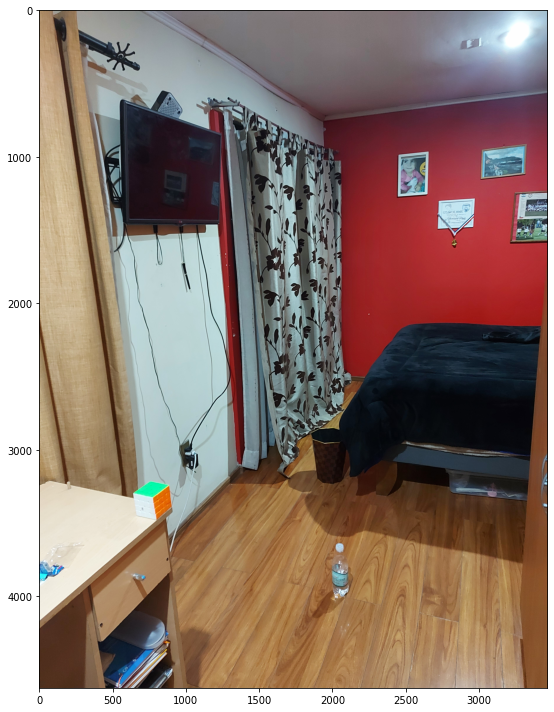

In [23]:
 # PREGUNTA 3: ESCRIBA CODIGO AQUI
plt.figure(figsize = (10,10))

img = cv2.imread('img2.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 4) Defina manualmente los puntos 2D de la calibración

(2 Puntos)

Despliegue la imagen y sobre ponga los puntos 2D como puntos rojos.

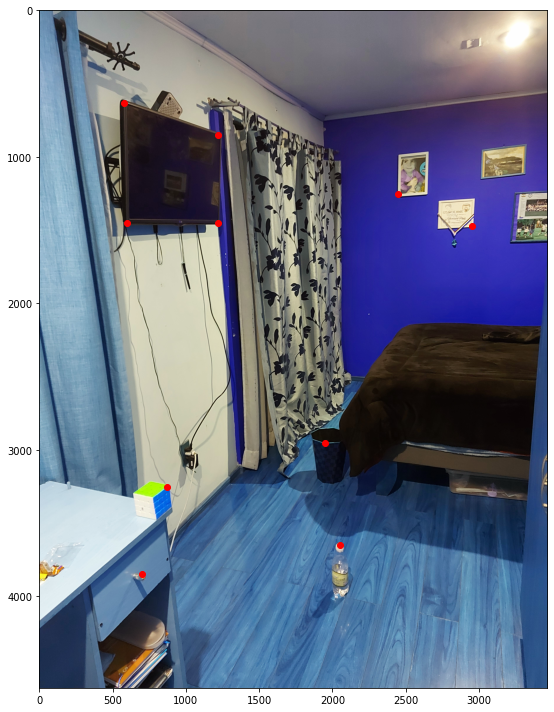

In [98]:
 # PREGUNTA 4: ESCRIBA CODIGO AQUI
plt.figure(figsize = (10,10))

u = np.array([1950, 2050, 870, 2450, 2950, 1220, 1220, 580, 600, 700])
v = np.array([2950, 3650, 3250, 1250, 1470, 1450, 850, 630, 1450, 3850])
o = np.ones((1,len(u)))
w = np.vstack([u,v,o])

plt.imshow(img,cmap='gray')
plt.scatter(u,v,c='red')
plt.show()

# 5) Defina a partir de mediciones realizadas los puntos 3D de la calibración

(1 Punto)

El output debe ser un arreglo de 4 x n elementos, donde n es el número de puntos 3D.


In [100]:
 # PREGUNTA 5: ESCRIBA CODIGO AQUI

p0 = np.array([   40,    580,   270, 1]).reshape(4,1)
p1 = np.array([   800,   880,   215, 1]).reshape(4,1)
p2 = np.array([   1500,   630,  840, 1]).reshape(4,1)
p3 = np.array([   -2000,  650,  1675, 1]).reshape(4,1)
p4 = np.array([   -2000,  1260, 1385, 1]).reshape(4,1)
p5 = np.array([   120,    65,    1505, 1]).reshape(4,1)
p6 = np.array([   120,    120,    1920, 1]).reshape(4,1)
p7 = np.array([   840,   130,    1920, 1]).reshape(4,1)
p8 = np.array([   840,    750,    1505, 1]).reshape(4,1)
p9 = np.array([   1640,   660,    690, 1]).reshape(4,1)

M = np.hstack([p0,p1,p2,p3,p4,p5,p6,p7])
M

array([[   40,   800,  1500, -2000, -2000,   120,   120,   840],
       [  580,   880,   630,   650,  1260,    65,   120,   130],
       [  270,   215,   840,  1675,  1385,  1505,  1920,  1920],
       [    1,     1,     1,     1,     1,     1,     1,     1]])

# 6) Usando las funciones definidas en el punto 2) calibre la cámara

(3 Puntos)

El output de esta pregunta es la proyección de los puntos 3D sobre la imagen usando los dos métodos. Despliegue también los puntos rojos de la pregunta 4. En una buena calibración los puntos rojos (medición 2d) deben coincidir con los azules (reproyección de los puntos 3D usando el modelo calibrado). 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


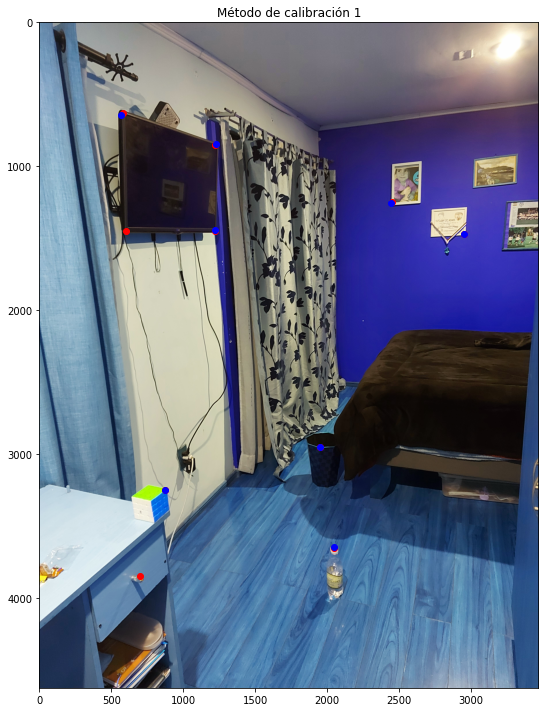

In [102]:
 # PREGUNTA 6: ESCRIBA CODIGO AQUI
plt.figure(figsize = (10,10))

P_1 = calibra_solucion_1(M,w)


plt.title('Método de calibración 1')
plt.imshow(img,cmap='gray')
plt.scatter(w[0,:],w[1,:],c='red')

ws = np.dot(P_1,M)
ws = ws/ws[-1]
plt.scatter(ws[0,:],ws[1,:],c='blue')

plt.show()

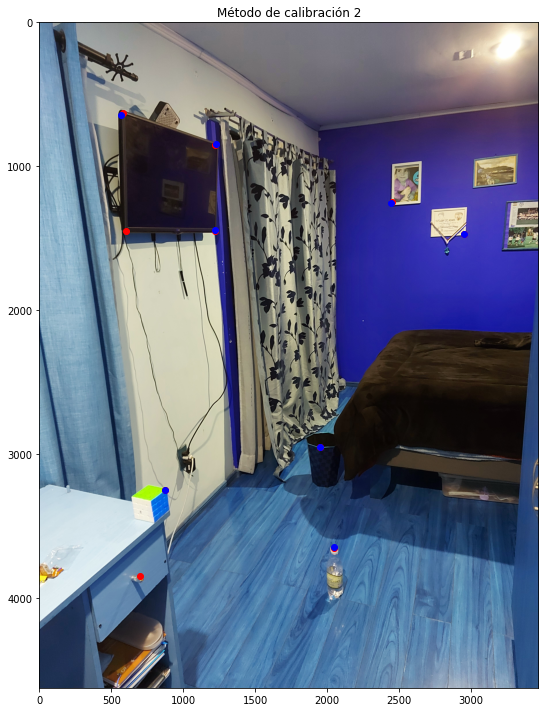

In [107]:
plt.figure(figsize = (10,10))

P_2 = calibra_solucion_2(M,w)

plt.title('Método de calibración 2')
plt.imshow(img,cmap='gray')
plt.scatter(w[0,:],w[1,:],c='red')

ws_2 = np.dot(P_2,M)
ws_2 = ws_2/ws_2[-1]
plt.scatter(ws_2[0,:],ws_2[1,:],c='blue')

plt.show()

# 7) Calcule el error promedio en pixeles

(1 Punto)

Calcule la distancia promedio de los puntos rojos a los azules en pixeles del segundo método.


In [125]:
 # PREGUNTA 7: ESCRIBA CODIGO AQUI
np.fix(ws_2)
w = np.vstack([u,v])

print('Puntos medidos:')
print(w[0:2,:])
print('Puntos estimados:')
print(np.fix(ws_2[0:2,:]))


distance = 0
for i in range(8):
  distance += np.linalg.norm(w[0:2,i]- np.fix(ws_2[0:2,i]))

print(f'\n\n Distancia promedio = {distance/8}')

Puntos medidos:
[[1950 2050  870 2450 2950 1220 1220  580  600  700]
 [2950 3650 3250 1250 1470 1450  850  630 1450 3850]]
Puntos estimados:
[[1949. 2048.  872. 2446. 2951. 1221. 1229.  567.]
 [2953. 3647. 3250. 1252. 1468. 1445.  843.  640.]]


 Distancia promedio = 6.04725326244658


# 8) Dibuje las coordenadas (X,Y,Z) y el origen C

(2 Puntos)

Con la calibración del método 2, despliegue la imagen de calibración, dibuje los tres ejes, indique con la letra 'C' el origen, y con las letras X,Y,Z cada eje.

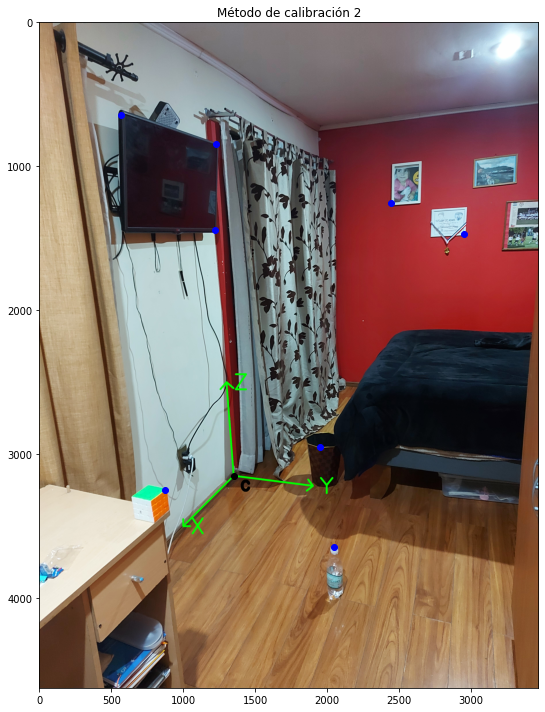

In [174]:
 # PREGUNTA 8: ESCRIBA CODIGO AQUI
plt.figure(figsize = (10,10))

im = cv2.imread('img2.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.title('Método de calibración 2')
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cmap='gray')
plt.scatter(ws_2[0,:],ws_2[1,:],c='blue')

C = np.array([1350,3150])

plt.scatter(C[0],C[1],c='black')
plt.imshow(cv2.putText(im, 'C', (C[0]+50,C[1]+100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 20, cv2.LINE_AA))

#Dibujamos los ejes

font = cv2.FONT_HERSHEY_SIMPLEX
# fontScale
fontScale = 5
#color
color = (0,255,0)
#thickness
thickness = 12

#Eje X
plt.imshow(cv2.arrowedLine(im, (C[0], C[1]), (1000, 3500), color, thickness))
plt.imshow(cv2.putText(im, 'X', (1050, 3550), font, fontScale, color, thickness, cv2.LINE_AA))

#Eje Y
plt.imshow(cv2.arrowedLine(im, (C[0], C[1]), (1900, 3220), color, thickness))
plt.imshow(cv2.putText(im, 'Y', (1950, 3270), font, fontScale, color, thickness, cv2.LINE_AA))

#Eje Z
plt.imshow(cv2.arrowedLine(im, (C[0], C[1]), (1300, 2500), color, thickness))
plt.imshow(cv2.putText(im, 'Z', (1350, 2550), font, fontScale, color, thickness, cv2.LINE_AA))


plt.show()